In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math

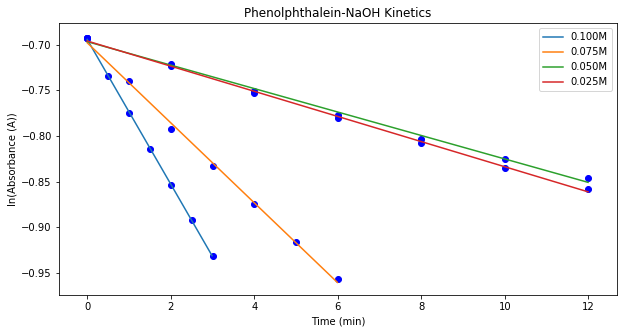

k1 for 0.100M is: 0.0792
k1 for 0.075M is: 0.0438
k1 for 0.050M is: 0.0129
k1 for 0.025M is: 0.0138

All of the runs are linear in Absorbance, because after fitting them to linear regressions, they all had high r squared values
r^2 for 0.100M is:0.99990
r^2 for 0.075M is:0.9983
r^2 for 0.050M is:0.997
r^2 for 0.025M is:0.9998


In [127]:
a100=np.array([.5,.48,.461,.443,.426,.410,.394])
a075=np.array([.5,.477,.453,.435,.417,.400,.384])
a050=np.array([.5,.486,.472,.460,.448,.438,.429])
a025=np.array([.5,.485,.471,.458,.446,.434,.424])
t100=np.array([0.,.5,1.,1.5,2.,2.5,3.])
t075=np.array([0.,1.,2.,3.,4.,5.,6.])
t050=np.array([0.,2.,4.,6.,8.,10.,12.])
t025=np.array([0.,2.,4.,6.,8.,10.,12.])


df=pd.DataFrame({'0.100M NaOH  Time (min)':t100,
                 '0.075M NaOH  Time (min)':t075,
                 '0.050M NaOH  Time (min)':t050,
                 '0.025M NaOH  Time (min)':t025,
                 '0.100M NaOH  Absorbance (A)':a100,
                 '0.075M NaOH  Absorbance (A)':a075,
                 '0.050M NaOH  Absorbance (A)':a050,
                 '0.025M NaOH  Absorbance (A)':a025,
                 '0.100M NaOH  ln(A)':np.log(a100),
                 '0.075M NaOH  ln(A)':np.log(a075),
                 '0.050M NaOH  ln(A)':np.log(a050),
                 '0.025M NaOH  ln(A)':np.log(a025)})
x1=df.iloc[:,0].values
y1=df.iloc[:,8].values
x2=df.iloc[:,1].values
y2=df.iloc[:,9].values
x3=df.iloc[:,2].values
y3=df.iloc[:,10].values
x4=df.iloc[:,3].values
y4=df.iloc[:,11].values
m1,b1,r1=stats.linregress(x1,y1)[0:3]
m2,b2,r2=stats.linregress(x2,y2)[0:3]
m3,b3,r3=stats.linregress(x3,y3)[0:3]
m4,b4,r4=stats.linregress(x4,y4)[0:3]
X1=np.arange(0,x1.max(),.01)
Y1=m1*X1+b1
X2=np.arange(0,x2.max(),.01)
Y2=m2*X2+b2
X3=np.arange(0,x3.max(),.01)
Y3=m3*X3+b3
X4=np.arange(0,x4.max(),.01)
Y4=m4*X4+b4
fig=plt.figure(figsize=(10,5))
plt.plot(X1,Y1,label='0.100M')
plt.plot(X2,Y2,label='0.075M')
plt.plot(X3,Y3,label='0.050M')
plt.plot(X4,Y4,label='0.025M')
plt.scatter(x1,y1,color='b')
plt.scatter(x2,y2,color='b')
plt.scatter(x3,y3,color='b')
plt.scatter(x4,y4,color='b')
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('ln(Absorbance (A))')
plt.title('Phenolphthalein-NaOH Kinetics')
plt.show()
conc=np.array(['0.100','0.075','0.050','0.025'])
x=np.array([x1,x2,x3,x4])
y=np.array([y1,y2,y3,y4])
m=np.array([m1,m2,m3,m4])
b=np.array([b1,b2,b3,b4])
r=np.array([r1,r2,r3,r4])**2
for i in range(4):
    print('k1 for '+str(conc[i])+'M is: ' +str(round(-1*m[i],4)))
print('')
print('All of the runs are linear in Absorbance, because after fitting them to linear regressions, they all had high r squared values')
print('r^2 for 0.100M is:'+str(round(r[0],5))+'0')
print('r^2 for 0.075M is:'+str(round(r[1],4)))
print('r^2 for 0.050M is:'+str(round(r[2],3)))
print('r^2 for 0.025M is:'+str(round(r[3],3))+'8')

In [142]:
k1=-m
M=np.array([.1,.075,.050,.025])
A=k1
B=k1/M
C=k1/M**2



dff=pd.DataFrame({'[NaOH](M)':conc,
                  'k1':k1,
                  'A (Zero order in base)':A,
                  'B (First order in base)':B,
                  'C (Second order in base)':C})
# dff.Index.rename('Run No.')
dff.index=[1,2,3,4]
dff.index.names=['Run No.']
print('The coefficient of variation for A, B, and C are: ')
print(round(stats.variation(A),3))
print(round(stats.variation(B),3))
print(round(stats.variation(C),3))
print('This means that column B has the least variation and is the most constant.')
print('This makes this reaction 1st order with respect to NaOH, because the rate constant shouldn\'t change.')
print('By calculating the rate constant assuming the reaction depends on [NaOH]^1, the rate constant had the least variation')

dff

The coefficient of variation for A, B, and C are: 
0.726
0.349
0.618
This means that column B has the least variation and is the most constant.
This makes this reaction 1st order with respect to NaOH, because the rate constant shouldn't change.
By calculating the rate constant assuming the reaction depends on [NaOH]^1, the rate constant had the least variation


,[NaOH](M),k1,A (Zero order in base),B (First order in base),C (Second order in base)
Run No.,,,,,
1,0.100,0.079213,0.079213,0.792134,7.921344
2,0.075,0.043815,0.043815,0.584194,7.789247
3,0.050,0.012850,0.012850,0.257007,5.140134
4,0.025,0.013774,0.013774,0.550980,22.039194


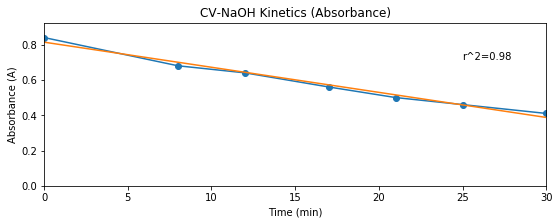

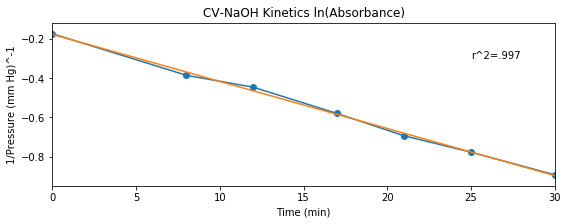

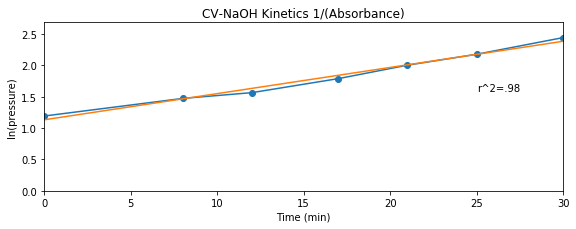

In [63]:
t=np.array([0.,8.,12.,17.,21.,25.,30.])
a=np.array([.84,.68,.64,.56,.5,.46,.41])
df1=pd.DataFrame({'Time (min)':t,'Absorbance (A)':a,'ln(Absorbance)':np.log(a),'1/Absorbance':a**-1.})

x=df1.iloc[:,0].values
y=df1.iloc[:,1].values
m,b,r=stats.linregress(x,y)[0:3]
X=np.arange(0,30,.01)
Y=m*X+b
fig=plt.figure(figsize=(9,3))
plt.scatter(x,y)
plt.plot(x,y)
plt.plot(X,Y)
plt.title("CV-NaOH Kinetics (Absorbance)")
plt.xlabel(df1.columns[0])
plt.ylabel(df1.columns[1])
plt.xlim(0,30)
plt.ylim(0,(y.max()+y.max()*.1))
plt.text(25,.85*y.max(),'r^2='+str(round(r**2,2)))
plt.show()

x=df1.iloc[:,0].values
y=df1.iloc[:,1].values
y=np.array(y)
y=np.log(y)
m,b,r=stats.linregress(x,y)[0:3]
X=np.arange(0,30,.01)
Y=m*X+b
fig=plt.figure(figsize=(9,3))
plt.scatter(x,y)
plt.plot(x,y)
plt.plot(X,Y)
plt.title("CV-NaOH Kinetics ln(Absorbance)")
plt.xlabel(df1.columns[0])
plt.ylabel('1/Pressure (mm Hg)^-1')
plt.xlim(0,30)
plt.text(25,-.3,'r^2=.997')
plt.show()

x=df1.iloc[:,0].values
y=df1.iloc[:,1].values
y=np.array(y)
y=y**-1
m,b,r=stats.linregress(x,y)[0:3]
X=np.arange(0,30,.01)
Y=m*X+b
fig=plt.figure(figsize=(9.3,3.1))
plt.scatter(x,y)
plt.plot(x,y)
plt.plot(X,Y)
plt.title("CV-NaOH Kinetics 1/(Absorbance)")
plt.xlabel(df1.columns[0])
plt.ylabel('ln(pressure)')
plt.xlim(0,30)
plt.ylim(0,(y.max()+y.max()*.1))
plt.text(25,.65*y.max(),'r^2=.98')
plt.show()

In [76]:
# x=df1.iloc[:,0].values
# y=df1.iloc[:,1].values
# y=np.array(y)
# y=np.log(y)
# m,b,r=stats.linregress(x,y)[0:3]
# X=np.arange(0,30,.01)
# Y=m*X+b
# fig=plt.figure(figsize=(9,3))
# plt.scatter(x,y)
# plt.plot(x,y)
# plt.plot(X,Y)
# plt.title("CV-NaOH Kinetics ln(Absorbance)")
# plt.xlabel(df1.columns[0])
# plt.ylabel('1/Pressure (mm Hg)^-1')
# plt.xlim(0,30)
# plt.text(25,-.3,'r^2=.997')
# plt.show()
print('The reaction order in CV is 1st order. This is because after plotting absorbance, ln(absorbance), and 1/absorbance vs time and running a linear regression, it was determined that ln(absorbance) was most linear. This means the rate of reaction depended on the concentration of CV to the 1st power.')
print('')
print('The negative slope of the ln(absorbance) graph is 2.39 x 10^-2 A/min. In seconds, this is 3.98 x 10^-4 A/s.')
print('To convert absorbance to Concentration, we know that A=b*M where b is some constant.')
print('Knowing M=0.00800 and A=0.840 at time=0, we can find b = .84/.008 = 105. A=105*M' )
print('The new rate in M/s is 3.98x10^-4/105 = 3.79 x 10^-6.') 
print('k1 = 3.79 x 10^-6 M/s. This is the pseudo-rate.')
print('')
print('[NaOH] is 1000 times greater than 0.00800M, so [NaOH]=8.00M')
print('k2=k1/[NaOH], k2 = (3.79 x 10^-6)/8 = 4.74 x 10^-7. ')
print('k2=4.74 x 10^-7 M/s')
df1

The reaction order in CV is 1st order. This is because after plotting absorbance, ln(absorbance), and 1/absorbance vs time and running a linear regression, it was determined that ln(absorbance) was most linear. This means the rate of reaction depended on the concentration of CV to the 1st power.

The negative slope of the ln(absorbance) graph is 2.39 x 10^-2 A/min. In seconds, this is 3.98 x 10^-4 A/s.
To convert absorbance to Concentration, we know that A=b*M where b is some constant.
Knowing M=0.00800 and A=0.840 at time=0, we can find b = .84/.008 = 105. A=105*M
The new rate in M/s is 3.98x10^-4/105 = 3.79 x 10^-6.
k1 = 3.79 x 10^-6 M/s. This is the pseudo-rate.

[NaOH] is 1000 times greater than 0.00800M, so [NaOH]=8.00M
k2=k1/[NaOH], k2 = (3.79 x 10^-6)/8 = 4.74 x 10^-7. 
k2=4.74 x 10^-7 M/s


,Time (min),Absorbance (A),ln(Absorbance),1/Absorbance
0,0.0,0.84,-0.174353,1.190476
1,8.0,0.68,-0.385662,1.470588
2,12.0,0.64,-0.446287,1.562500
3,17.0,0.56,-0.579818,1.785714
4,21.0,0.50,-0.693147,2.000000
5,25.0,0.46,-0.776529,2.173913
6,30.0,0.41,-0.891598,2.439024
